<a href="https://colab.research.google.com/github/monishsai4/MyAIStuff/blob/main/Basic_F_B_logprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


### **Including the required libraries**

In [3]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import copy
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import classification_report
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression

### **Dataset manipulation according to our requirements**

In [4]:
train_dataset = h5py.File('Datasets/catvnoncat/train_catvnoncat.h5', "r")
train_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('Datasets/catvnoncat/test_catvnoncat.h5', "r")
test_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes

train_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

y = 0. It's anon-catpicture.


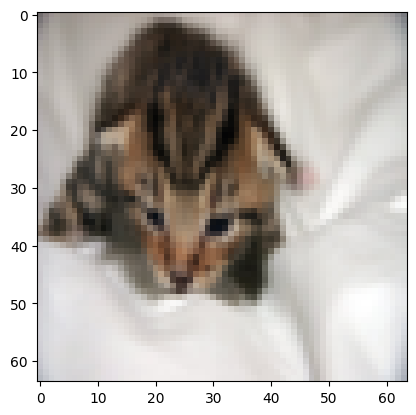

In [7]:
# Example of a 4icture
index = 1
plt.imshow(test_x_orig[index])
print ("y = "+ str(train_y[0,index]) + ". It's a" + classes[train_y[0,index]].decode("utf-8") + "picture.")


In [8]:
#m_train = train_x_orig.shape[0]
m_test = test_x_orig.shape[0]
num_px = train_x_orig.shape[1]

print ("Number of training examples: "+ str(m_train))
print ("Number of testing examples: "+ str(m_test))
print ("Each image is of size: (" + str(num_px) + ", "+ str(num_px) + ", 3)")
print ("train_x_orig shape: "+ str(train_x_orig.shape))
print ("train_y shape: "+ str(train_y.shape))
print ("test_x_orig shape: "+ str(test_x_orig.shape))
print ("test_y shape: "+ str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [9]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T 
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
#print(train_x_flatten)
#print(train_x_flatten.shape)
train_x = train_x_flatten/255
test_x = test_x_flatten/255
#print(train_x[1])
#predictions = (train_x > 0.5)
#print("Predictions: " + str(predictions))
#print ('Accuracy: %d' % float((np.dot(train_y, predictions.T) + np.dot(1 - train_y, 1 - predictions.T)) / float(train_y.size) * 100) + '%')
#print(train_x.shape)
print ("train_x's shape: "+ str(train_x.shape))
print ("test_x's shape: "+ str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


**Building the required model**

In [49]:
num_iterations=1000
learning_rate=0.009
m_train = train_x.shape[1]
#initializing parameters
w = np.zeros((train_x.shape[0],1))
b = 0.0
w = copy.deepcopy(w)
b = copy.deepcopy(b)
cost=np.zeros((num_iterations))
print(m_train)
for i in range(num_iterations):
    #m = train_x.shape[1]
    z=(np.dot(w.T,train_x) + b)
    A = 1/(1+np.exp(-z))
    #print(A.shape)
    cost[i]=-np.sum((train_y*np.log(A)+(1-train_y)*np.log(1-A)))/m_train
    dw = np.dot(train_x,(A-train_y).T)/m_train
    db = np.sum(A-train_y)/m_train
    w = w-learning_rate * dw
    b = b-learning_rate * db

209


Checking the train accuracy.

In [50]:
m_train = train_x.shape[1]
Y_prediction_train = np.zeros((1, m_train))
w = w.reshape(train_x.shape[0], 1)


z=(np.dot(w.T,train_x) + b)
A = 1/(1+np.exp(-z))

for i in range(A.shape[1]):
    if A[0, i] > 0.5:
        Y_prediction_train[0,i] = 1
    else:
        Y_prediction_train[0,i] = 0
print(Y_prediction_train.shape)
print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - train_y)) * 100))

(1, 209)
train accuracy: 98.08612440191388 %


Checking the test accuracy.


In [51]:
m_test = test_x.shape[1]
Y_prediction_test = np.zeros((1, m_test))
w = w.reshape(test_x.shape[0], 1)


z=(np.dot(w.T,test_x) + b)
A = 1/(1+np.exp(-z))

for i in range(A.shape[1]):
    if A[0, i] > 0.5:
        Y_prediction_test[0,i] = 1
    else:
        Y_prediction_test[0,i] = 0
print(Y_prediction_test.shape)
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - test_y)) * 100))

(1, 50)
test accuracy: 72.0 %
